In [186]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression

In [187]:
file="dataset2.csv"
df=pd.read_csv(file)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [189]:
year=[]
for row in range(len(df.yr_renovated)):
    if df.yr_renovated[row]==0:
        year.append(df.yr_built[row])
    else:
        year.append(df.yr_renovated[row])
df["year"]=year

In [190]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,year
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,2005
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,1921
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,1966
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,1963
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,1992


Analyzing Datatypes

In [191]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country', 'year'],
      dtype='object')

In [192]:
from sklearn.preprocessing import StandardScaler

def details(colname, scaling=False):
    print(colname)
    print("Value Counts \n",df[colname].value_counts(),"\n -")
    print("Correlation with Price \n", df[["price",colname]].corr(),"\n -")
    if scaling==True:
        scale=StandardScaler()
        df[colname]=scale.fit(df[colname])
        print("Scaling Done")
    print("--------------------------------------------")
    

In [193]:
column_names=['price', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'year']

In [194]:
df.price.value_counts()
df.price.replace(0.0,np.nan,inplace=True)
df.price.dropna(axis=0,inplace=True)

In [195]:
df[df.price.isna()==True]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,year
4354,2014-05-05 00:00:00,NaN,3.0,1.75,1490,10125,1.0,0,0,4,1490,0,1962,0,3911 S 328th St,Federal Way,WA 98001,USA,1962
4356,2014-05-05 00:00:00,NaN,4.0,2.75,2600,5390,1.0,0,0,4,1300,1300,1960,2001,2120 31st Ave W,Seattle,WA 98199,USA,2001
4357,2014-05-05 00:00:00,NaN,6.0,2.75,3200,9200,1.0,0,2,4,1600,1600,1953,1983,12271 Marine View Dr SW,Burien,WA 98146,USA,1983
4358,2014-05-06 00:00:00,NaN,5.0,3.50,3480,36615,2.0,0,0,4,2490,990,1983,0,21809 SE 38th Pl,Issaquah,WA 98075,USA,1983
4361,2014-05-07 00:00:00,NaN,5.0,1.50,1500,7112,1.0,0,0,5,760,740,1920,0,14901-14999 12th Ave SW,Burien,WA 98166,USA,1920
4362,2014-05-07 00:00:00,NaN,4.0,4.00,3680,18804,2.0,0,0,3,3680,0,1990,2009,1223-1237 244th Ave NE,Sammamish,WA 98074,USA,2009
4374,2014-05-09 00:00:00,NaN,2.0,2.50,2200,188200,1.0,0,3,3,2200,0,2007,0,39612 254th Ave SE,Enumclaw,WA 98022,USA,2007
4376,2014-05-09 00:00:00,NaN,4.0,2.25,2170,10500,1.0,0,2,4,1270,900,1960,2001,216 SW 183rd St,Normandy Park,WA 98166,USA,2001
4382,2014-05-12 00:00:00,NaN,5.0,4.50,4630,6324,2.0,0,0,3,3210,1420,2006,0,6925 Oakmont Ave SE,Snoqualmie,WA 98065,USA,2006
4383,2014-05-13 00:00:00,NaN,5.0,4.00,4430,9000,2.0,0,0,3,4430,0,2013,1923,9235 NE 5th St,Bellevue,WA 98004,USA,1923


In [196]:
df=df.dropna()
df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
year             0
dtype: int64

In [197]:
df[column_names].corr()

,price,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,year
price,1.000000,0.445494,0.051347,0.152758,0.150083,0.242587,0.038892,0.380661,0.217782,0.000565
sqft_living,0.445494,1.000000,0.213268,0.343513,0.107758,0.309343,-0.062529,0.875657,0.449671,0.099590
sqft_lot,0.051347,0.213268,1.000000,0.004245,0.017408,0.072527,0.000929,0.219193,0.035894,0.028232
floors,0.152758,0.343513,0.004245,1.000000,0.015804,0.031980,-0.273786,0.522215,-0.255042,0.186540
waterfront,0.150083,0.107758,0.017408,0.015804,1.000000,0.347572,0.006112,0.072502,0.088880,-0.012409
view,0.242587,0.309343,0.072527,0.031980,0.347572,1.000000,0.062560,0.174629,0.317117,-0.025688
condition,0.038892,-0.062529,0.000929,-0.273786,0.006112,0.062560,1.000000,-0.176549,0.197144,-0.513255
sqft_above,0.380661,0.875657,0.219193,0.522215,0.072502,0.174629,-0.176549,1.000000,-0.037597,0.163810
sqft_basement,0.217782,0.449671,0.035894,-0.255042,0.088880,0.317117,0.197144,-0.037597,1.000000,-0.096895
year,0.000565,0.099590,0.028232,0.186540,-0.012409,-0.025688,-0.513255,0.163810,-0.096895,1.000000


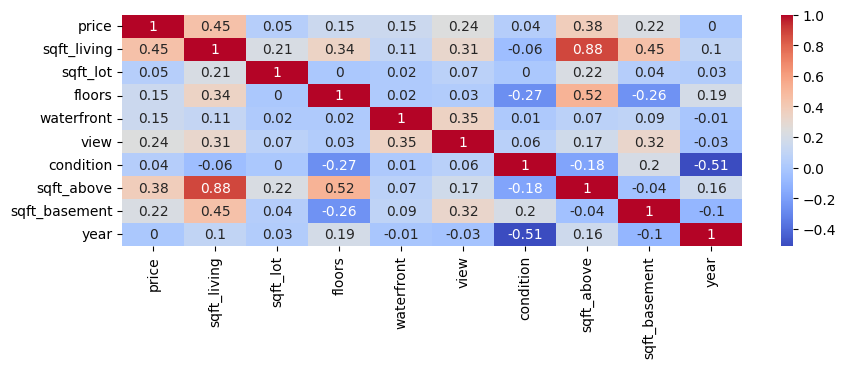

In [198]:

fig, ax = plt.subplots(figsize=(10, 3))
ax=sns.heatmap(round(df[column_names].corr(),2), annot=True, cmap="coolwarm")


In [199]:
# selected Columns are :  "price,""sqft_above","sqft_living",sqft_basement"
column_names=["price","sqft_above","sqft_living","sqft_basement"]


R Sq  :  0.14490275191488122
 Coef:  [[251.23219602]] 
 Intercept :  [100105.13741608]
MSE value for SLR : 271875622911.79895


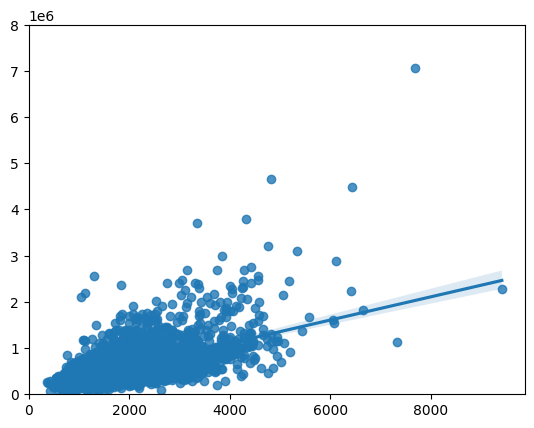

In [206]:
# SLR Using sqft_above

x=np.array(df.sqft_above).reshape(-1,1)
y=np.array(df.price).reshape(-1,1)
lm=LinearRegression()
lm.fit(x,y)
print("R Sq  : ", lm.score(x,y))
print(" Coef: ", lm.coef_, 
      "\n Intercept : ",lm.intercept_)

sns.regplot(data=df,x=x,y=y)
plt.ylim(0,8000000)
plt.xlim(0,)

from sklearn.metrics import mean_squared_error
mse=mean_squared_error(df.price,lm.predict(x))
print("MSE value for SLR :" , mse)

R Sq  :  0.1984646442964948
 Coef:  [[262.80379352]] 
 Intercept :  [-2489.61101243]
MSE value for SLR : 254845778776.29736


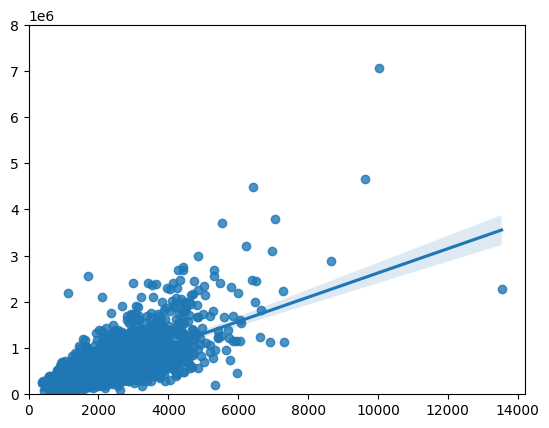

In [207]:
# SLR Using sqft_above

x=np.array(df.sqft_living).reshape(-1,1)
y=np.array(df.price).reshape(-1,1)
lm=LinearRegression()
lm.fit(x,y)
print("R Sq  : ", lm.score(x,y))
print(" Coef: ", lm.coef_, 
      "\n Intercept : ",lm.intercept_)

sns.regplot(data=df,x=x,y=y)
plt.ylim(0,8000000)
plt.xlim(0,)

from sklearn.metrics import mean_squared_error
mse=mean_squared_error(df.price,lm.predict(x))
print("MSE value for SLR :" , mse)

R Sq  :  0.047429141475269665
 Coef:  [[265.83819857]] 
 Intercept :  [475456.04458167]
MSE value for SLR : 302867067002.01953


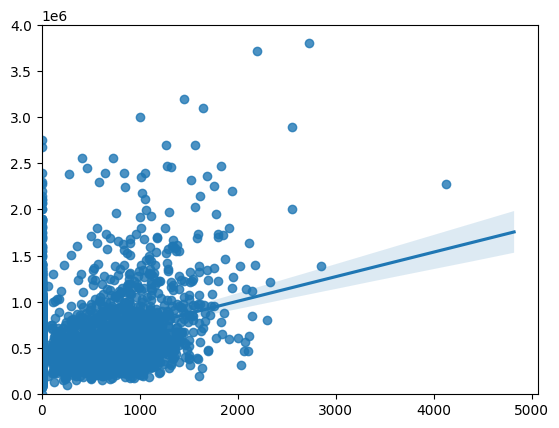

In [208]:
# SLR Using sqft_above

x=np.array(df.sqft_basement).reshape(-1,1)
y=np.array(df.price).reshape(-1,1)
lm=LinearRegression()
lm.fit(x,y)
print("R Sq  : ", lm.score(x,y))
print(" Coef: ", lm.coef_, 
      "\n Intercept : ",lm.intercept_)

sns.regplot(data=df,x=x,y=y)
plt.ylim(0,4000000)
plt.xlim(0,)

from sklearn.metrics import mean_squared_error
mse=mean_squared_error(df.price,lm.predict(x))
print("MSE value for SLR :" , mse)

In [209]:
# MLR 

y=np.array(df.price)
z=np.array(df[column_names])
lm=LinearRegression()
lm.fit(z,y)
print("R Sq  : ", lm.score(z,y))
print(" Coef: ", lm.coef_, 
      "\n Intercept : ",lm.intercept_)



R Sq  :  1.0
 Coef:  [1.00000000e+00 2.41702315e-15 8.08703373e-15 5.67001058e-15] 
 Intercept :  -1.1641532182693481e-10


MSE value for MLR : 2.452484569487348e-20


C:\Users\MAYANK\AppData\Local\Temp\ipykernel_2412\3022266133.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(df.price,hist=False,color="r", label="Actual Price")
C:\Users\MAYANK\AppData\Local\Temp\ipykernel_2412\3022266133.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.dis

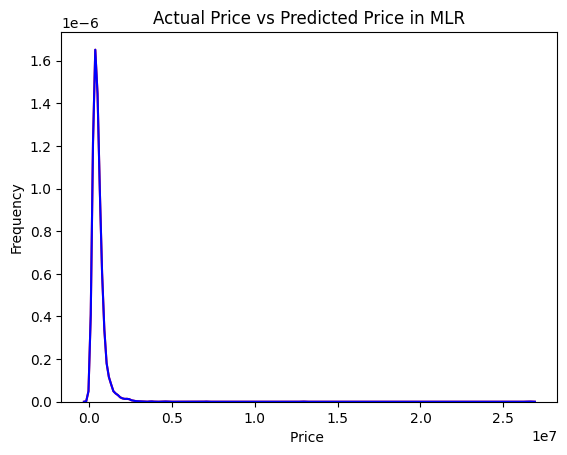

In [210]:
# Distribution Plot for MLR

yhat=lm.predict(z)

#RMSE Value for Error in MLR
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(df.price,yhat)
print("MSE value for MLR :" , mse)

ax=sns.distplot(df.price,hist=False,color="r", label="Actual Price")
sns.distplot(yhat,hist=False,color="b",label="Predicted Price" ,ax=ax)

plt.title("Actual Price vs Predicted Price in MLR")
plt.ylabel("Frequency")
plt.xlabel("Price ")

plt.show()

In [211]:
"done"

'done'